## 📊 Data exploration

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Loading the datsets

In [5]:
# Loading the datasets (train and test sets)
train_data = pd.read_csv("datasets/mitbih_train.csv", header=None)
test_data = pd.read_csv("datasets/mitbih_test.csv", header=None)

In [6]:
# Checking the shape of the datasets: (rows, columns)
print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

Training data shape: (87554, 188)
Test data shape: (21892, 188)


In [ ]:
# Checking the first few rows of the training dataset
train_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Checking the first few rows of the test dataset
test_data.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
# The last row is the dependent variable (the heart condition)
# Checking the distribution of the dependent variable in the training dataset
train_data[187].value_counts()

187
0.0    72471
4.0     6431
2.0     5788
1.0     2223
3.0      641
Name: count, dtype: int64

### Updating column headers to be time invervals

In [ ]:
# Generating column names based on timestamps
# The dataset contains samples from recordings of 360 samples per second
# To get the amount of time used to capture 187 samples:

# Given by 360 samples per second ((1 / 360) * 1000)ms
sampling_interval = 2.7777777777777777
time_stamps = [f"{round(i, 2)}ms" for i in np.arange(0, (187 * sampling_interval), sampling_interval)]

# Append the label column name
column_names = time_stamps + ["Label"]

In [11]:
# Assign the column names to the DataFrames
train_data.columns = column_names
test_data.columns = column_names

# Display the first few rows of the train dataset
train_data.head()

,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
# Checking the first few columns of the test dataset
test_data.head()

,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### Inputing label values for classes

In [13]:
# Define the label mapping for the heart conditions
label_mapping = {
    0: "Normal",
    1: "Supraventricular",
    2: "Ventricular",
    3: "Fusion",
    4: "Unknown"
}

# Replace integer labels with class names
train_data["Label"] = train_data["Label"].map(label_mapping)
test_data["Label"] = test_data["Label"].map(label_mapping)

In [14]:
train_data.head()

,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [15]:
test_data.head()

,0.0ms,2.78ms,5.56ms,8.33ms,11.11ms,13.89ms,16.67ms,19.44ms,22.22ms,25.0ms,...,494.44ms,497.22ms,500.0ms,502.78ms,505.56ms,508.33ms,511.11ms,513.89ms,516.67ms,Label
0,1.000000,0.758264,0.111570,0.000000,0.080579,0.078512,0.066116,0.049587,0.047521,0.035124,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
1,0.908425,0.783883,0.531136,0.362637,0.366300,0.344322,0.333333,0.307692,0.296703,0.300366,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
2,0.730088,0.212389,0.000000,0.119469,0.101770,0.101770,0.110619,0.123894,0.115044,0.132743,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
3,1.000000,0.910417,0.681250,0.472917,0.229167,0.068750,0.000000,0.004167,0.014583,0.054167,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal
4,0.570470,0.399329,0.238255,0.147651,0.000000,0.003356,0.040268,0.080537,0.070470,0.090604,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Normal


In [16]:
# Checking the label distribution in the training dataset
train_data.Label.value_counts()

Label
Normal              72471
Unknown              6431
Ventricular          5788
Supraventricular     2223
Fusion                641
Name: count, dtype: int64

### Checking for missing values and duplicates

In [17]:
# Checking for missing values and duplicates
## ...in the training set
print("Number of missing values in train dataset:", train_data.isnull().values.sum())
print("Number of missing values in test dataset:", test_data.isnull().values.sum())

## ...in the test dataset
print("\nNumber of duplicates in train dataset:", train_data.duplicated().values.sum())
print("Number of duplicates in test dataset:", test_data.duplicated().values.sum())

Number of missing values in train dataset: 0
Number of missing values in test dataset: 0

Number of duplicates in train dataset: 0
Number of duplicates in test dataset: 0


### Visualizing the class distribution

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

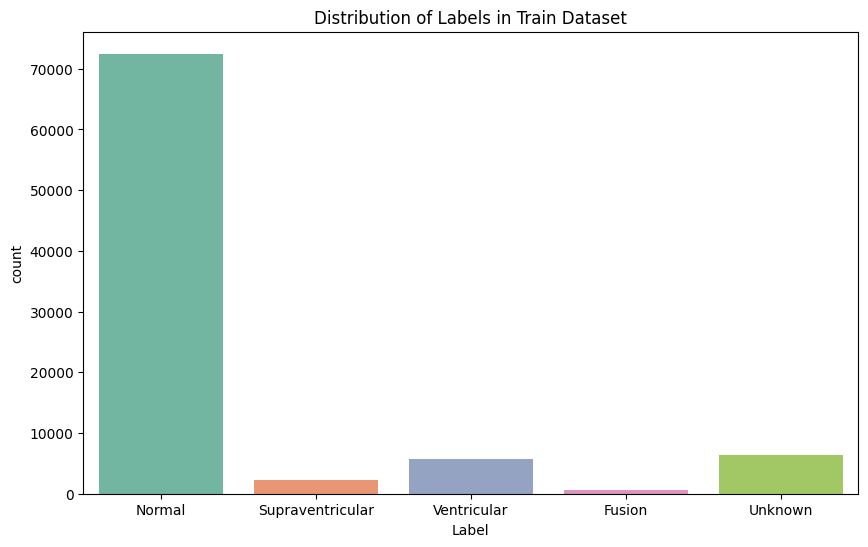

In [22]:
# Visualize the distribution of labels in the train dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=train_data, x="Label", hue="Label", palette="Set2", legend="auto")
plt.title("Distribution of Labels in Train Dataset")
plt.xlabel("Label")
plt.savefig("plots/train-data-distribution.png")
plt.show()

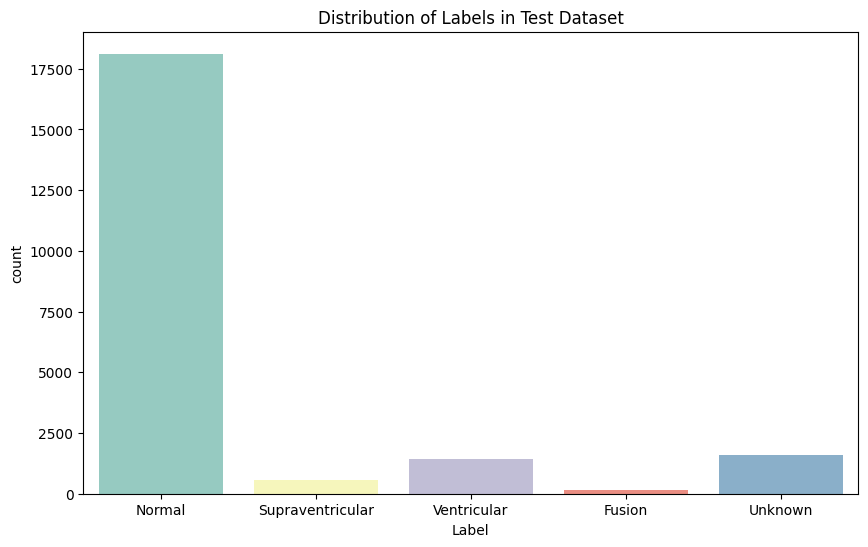

In [23]:
# Visualize the distribution of labels in the test dataset
plt.figure(figsize=(10, 6))
sns.countplot(data=test_data, x="Label", hue="Label", palette="Set3")
plt.title("Distribution of Labels in Test Dataset")
plt.xlabel("Label")
plt.savefig("plots/test-data-distribution.png")
plt.show()

### Visualizing samples for each class

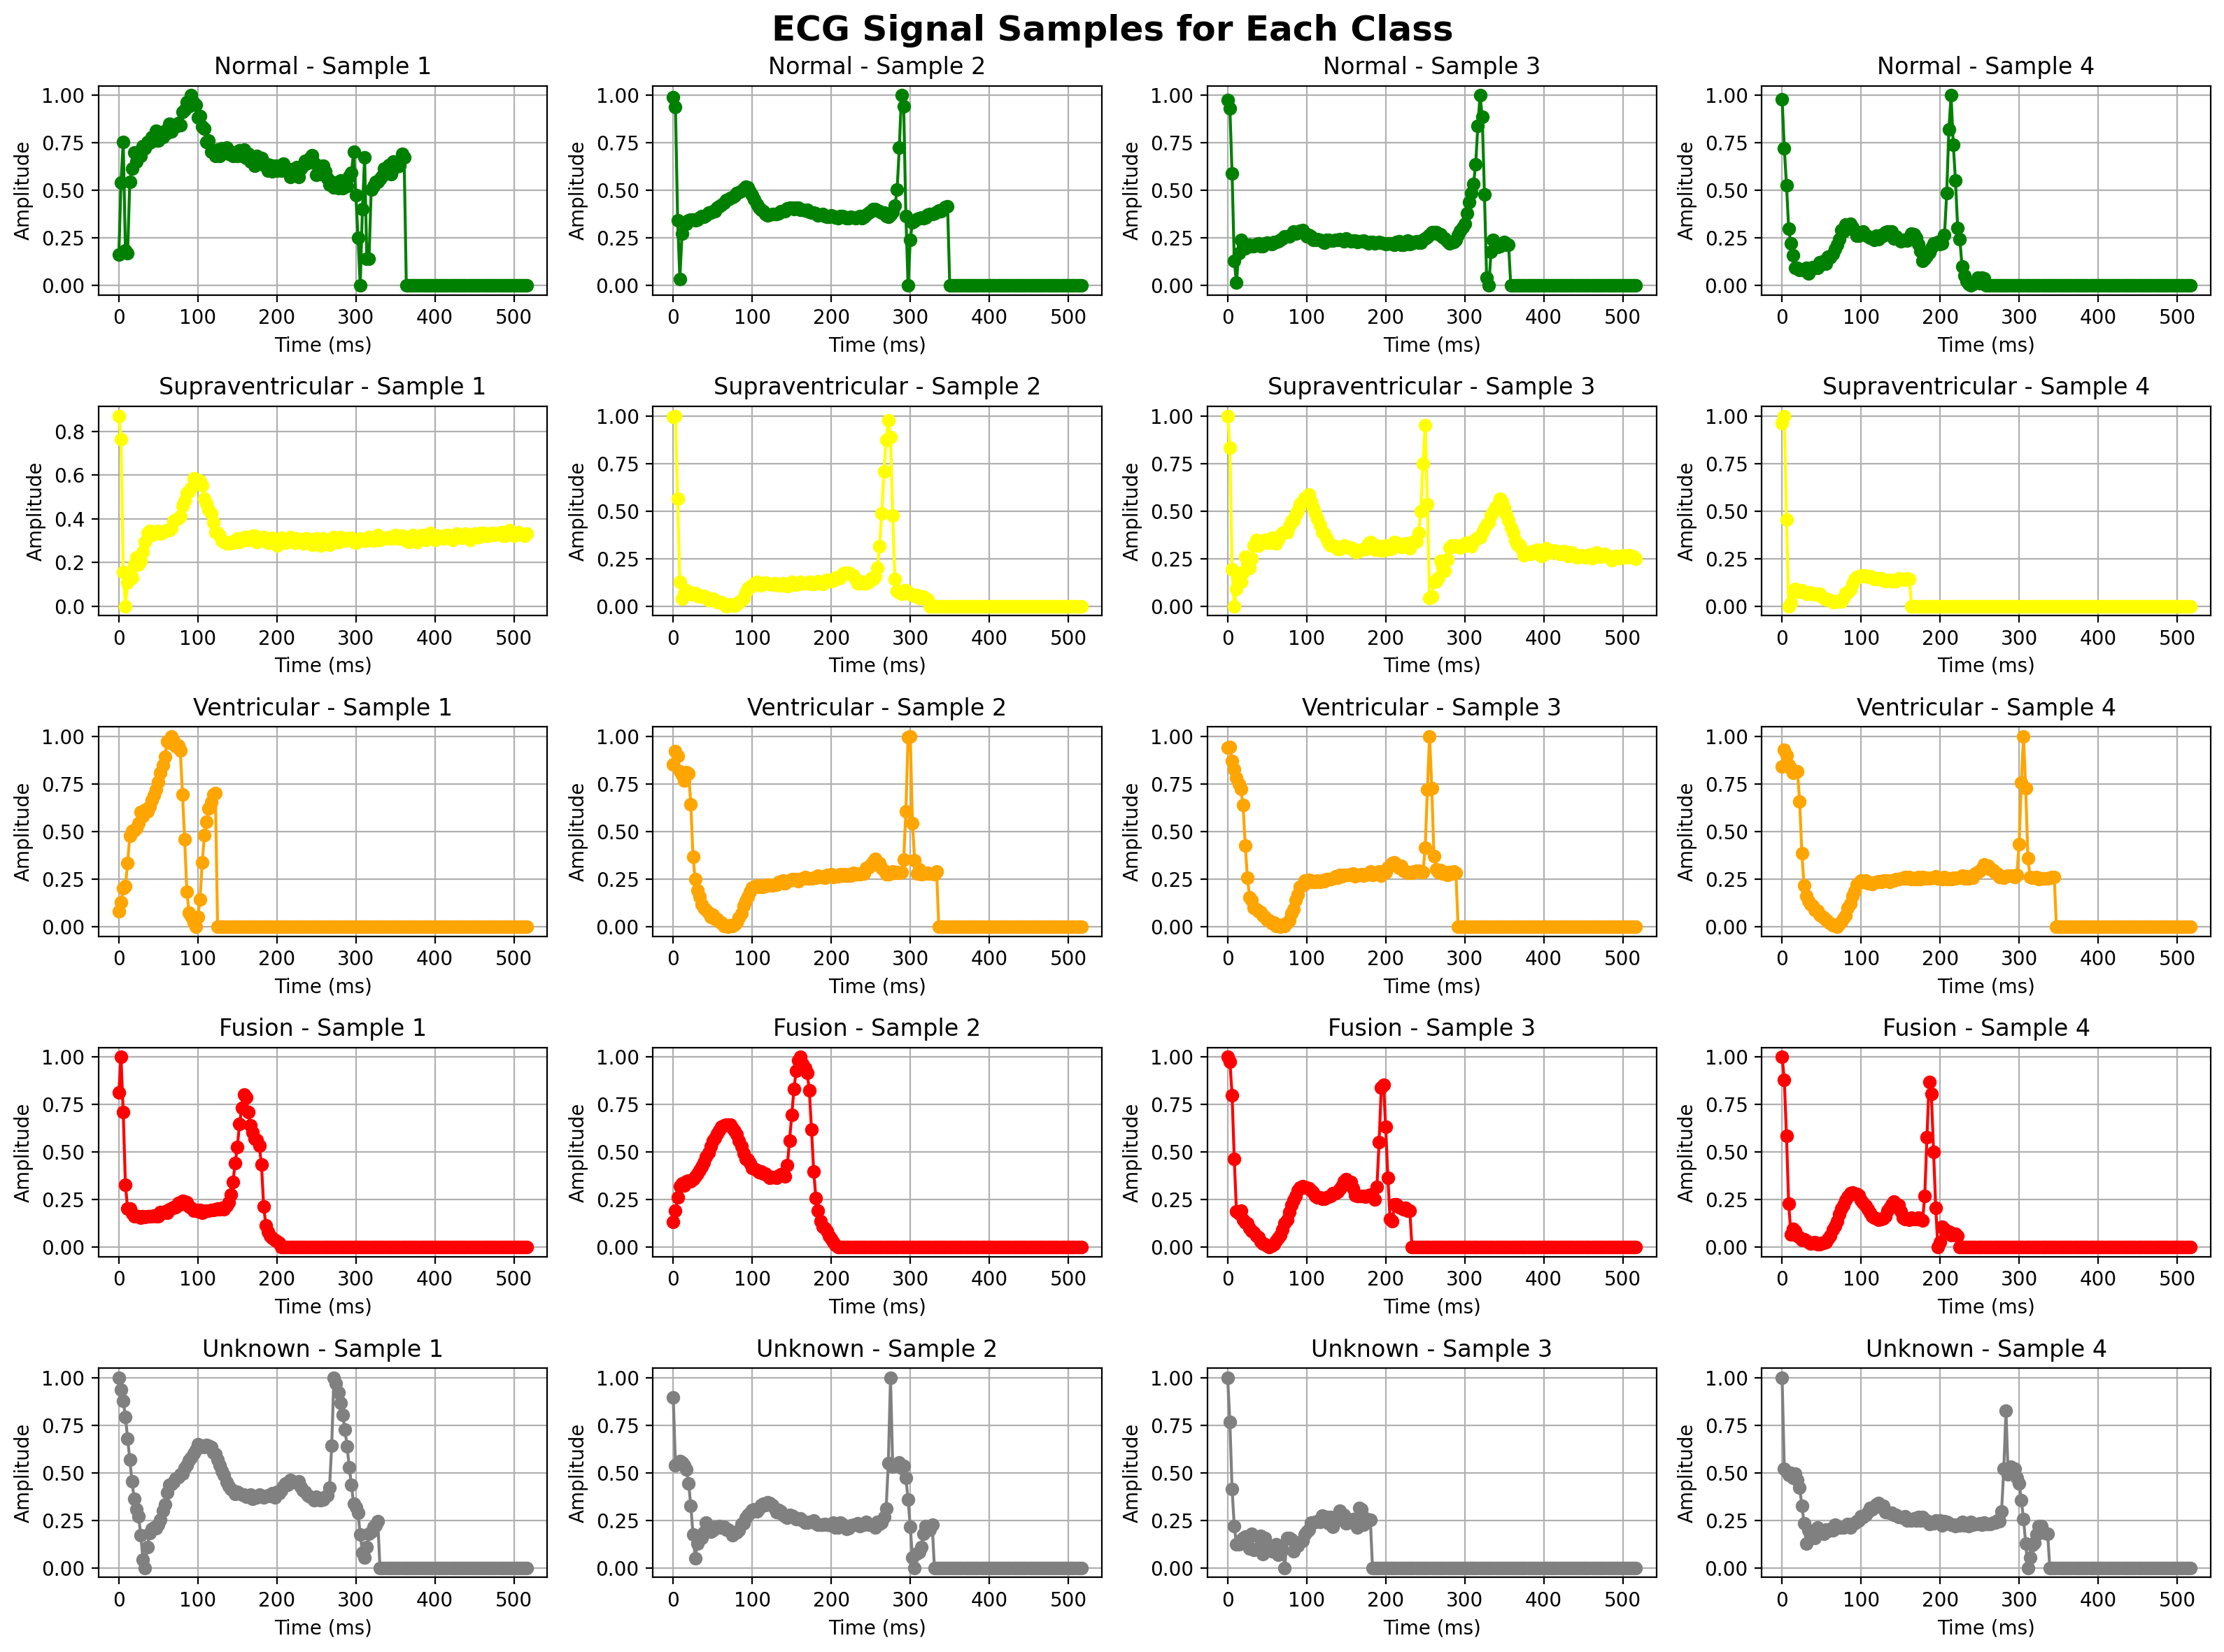

In [24]:
# Define color mapping based on severity of the heart conditions
color_mapping = {
    "Normal": "green",
    "Supraventricular": "yellow",
    "Ventricular": "orange",
    "Fusion": "red",
    "Unknown": "gray"
}

# Sampling interval for correct time axis
time_values = np.arange(0, 187 * sampling_interval, sampling_interval)  # Time in ms

# Get unique class names from dataset
class_names = train_data["Label"].unique()

# Create subplots: 5 classes × 4 samples each
fig, axes = plt.subplots(len(class_names), 4, figsize=(16, 12), dpi=200)

# Plot 4 random samples for each class
for i, class_name in enumerate(class_names):
    # Randomly select 4 samples for the class
    samples = train_data[train_data["Label"] == class_name].sample(n=4, random_state=42).iloc[:, :-1].values

    for j in range(4):
        axes[i, j].plot(time_values, samples[j], marker='o', linestyle='-', color=color_mapping[class_name])
        axes[i, j].set_title(f"{class_name} - Sample {j+1}")
        axes[i, j].set_xlabel("Time (ms)")
        axes[i, j].set_ylabel("Amplitude")
        axes[i, j].grid(True)

# Title for the plot
plt.suptitle("ECG Signal Samples for Each Class", fontsize=18, fontweight="bold")

# Adjust layout
plt.tight_layout()
plt.savefig("plots/ecg-samples-per-class.png")
plt.show()

### Saving the final version of the datsets

In [26]:
# Save the modified datasets as new CSV files
train_data.to_csv("datasets/mitbih_train_cleaned.csv", index=False)
test_data.to_csv("datasets/mitbih_test_cleaned.csv", index=False)